In [7]:
import numpy as np
import scipy as sp
import suite2p as s2p
import dill

import TwoPUtils as tpu
import STX3KO_analyses as stx
import os
from matplotlib import pyplot as plt

plt.rcParams['pdf.fonttype']=42
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
write_folder = os.path.join('/mnt','BigDisk','2P_scratch')


mouse = 'Cre7'

file_list = stx.ymaze_sess_deets.KO_sessions[mouse]
for f in file_list[6:]:
    print(f)

({'date': '24_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': -1, 'novel_arm': -1, 'ravel_ind': 6}, {'date': '24_10_2021', 'scene': 'YMaze_RewardReversal', 'session': 2, 'scan': 6, 'novel_arm': -1, 'ravel_ind': 7})
{'date': '25_10_2021', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 8}
({'date': '26_10_2021', 'scene': 'YMaze_RewardReversal', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 9}, {'date': '26_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 10})


In [3]:
def check_and_make_h5s(file_list, runh5=True):
    h5list, framerates = [], []
    for f in file_list:
        print(f)
        scan_str = "%s_%03d_%03d" % (f['scene'],f['session'],f['scan'])
        source_folder  = os.path.join('/mnt','BigDisk','2P_scratch')
        source_stem = os.path.join(source_folder,mouse,f['date'],f['scene'],scan_str)
        info = tpu.scanner_tools.sbx_utils.loadmat(source_stem+'.mat')
        
        file_stem = os.path.join(write_folder,mouse,f['date'],f['scene'],scan_str)
        h5path = os.path.join(file_stem,scan_str+".h5")
        if not os.path.exists(h5path) and runh5:
            _ =  tpu.scanner_tools.sbx_utils.sbx2h5(source_stem,output_name=h5path,force_2chan=False)

        h5list.append(file_stem)
        framerates.append(info['frame_rate'])
    print(h5list)
    return h5list, framerates

In [4]:
def run_session(fdict):
    _h5list,_frs = check_and_make_h5s([fdict,],runh5=True)
    ops_dir = os.path.join(_h5list[0],'suite2p','plane0','ops.npy')
    s2p_dir = os.path.join(_h5list[0],'suite2p','plane0')

    ops = tpu.s2p.set_ops(d={'data_path': _h5list,
                                   'save_path0': _h5list[0],
                                    'fast_disk':[],
                                    'move_bin':True,
                                    'two_step_registration':True,
                                    'maxregshiftNR':10,
                                    'tau':.7,
                                    'functional_chan':1,
                                    'fs':_frs[0],
                                    'roidetect':True,
                                    'input_format':"h5",
                                    'h5py_key':'data',
                                    'nchannels':2,
                                    'threshold_scaling':1,
                                    'chan2_thresh':.01})
    ops=s2p.run_s2p(ops=ops)
    !rm {_h5list[0]}/*.h5 




In [ ]:
for f in file_list[6:]: #file_list:
    
    if isinstance(f,tuple):
        for _f in f:
            if _f['scan']>0:
                run_session(_f)
    else:
        if _f['scan']>0:
            run_session(f)

In [12]:
f = [{'date': "28_10_2021",
     'scene': 'YMaze_LNovel',
     'session': 3,
     'scan': 4,
     'novel_arm': -1,
     'region': 'DG'
    },]
     

_h5list,_frs = check_and_make_h5s(f,runh5=True)
ops_dir = os.path.join(_h5list[0],'suite2p','plane0','ops.npy')
s2p_dir = os.path.join(_h5list[0],'suite2p','plane0')

ops = tpu.s2p.set_ops(d={'data_path': _h5list,
                               'save_path0': _h5list[0],
                                'fast_disk':[],
                                'move_bin':True,
                                'two_step_registration':True,
                                'maxregshiftNR':10,
                                'tau':.7,
                                'functional_chan':1,
                                'fs':_frs[0],
                                'roidetect':True,
                                'input_format':"h5",
                                'h5py_key':'data',
                                'nchannels':1,
                                'threshold_scaling':1,
                                'chan2_thresh':.01})
ops=s2p.run_s2p(ops=ops)
!rm {_h5list[0]}/*.h5 

{'date': '28_10_2021', 'scene': 'YMaze_LNovel', 'session': 3, 'scan': 4, 'novel_arm': -1, 'region': 'DG'}
['/mnt/BigDisk/2P_scratch/Cre7/28_10_2021/YMaze_LNovel/YMaze_LNovel_003_004']
{}
h5
** Found 1 h5 files - converting to binary **
NOTE: using a list of h5 files:
['/mnt/BigDisk/2P_scratch/Cre7/28_10_2021/YMaze_LNovel/YMaze_LNovel_003_004/YMaze_LNovel_003_004.h5']
time 284.21 sec. Wrote 27066 frames per binary for 1 planes
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not registered / registration forced with ops['do_registration']>1
      (no previous offsets to delete)
----------- REGISTRATION
registering 27066 frames
Reference frame, 19.15 sec.
Registered 2000/27066 in 97.24s
Registered 4000/27066 in 175.47s
Registered 6000/27066 in 252.44s
Registered 8000/27066 in 327.99s
Registered 10000/27066 in 402.66s
Registered 12000/27066 in 476.20s
Registered 14000/27066 in 549.81s
Registered 16000/27066 in 623.41s
Registered 18000/27066 in 696.77s
Registered 20000/27066 in 7

In [3]:
mouse = 'Cre7'
file_list = [{'date': "28_10_2021",'scene': 'YMaze_LNovel', 'session': 2, 'scan': 2, 'novel_arm': -1,'region': 'DG'},
                 {'date': "28_10_2021",'scene': 'YMaze_LNovel', 'session': 3, 'scan': 4, 'novel_arm': -1,'region': 'DG'},]
sess_dir = os.path.join('/home/mplitt/YMazeSessPkls',mouse)
sess_list = []
for sess_deets in file_list:
    with open(os.path.join(sess_dir,sess_deets['date'],"%s_%d.pkl" % (sess_deets['scene'], sess_deets['session'])),'rb') as file:
                    sess_list.append(dill.load(file))
            
with open(os.path.join(sess_dir,'DG_roi_aligner_results.pkl'), 'rb') as file:
        match_inds = dill.load(file)
common_roi_mapping = stx.utilities.common_rois(match_inds, [0,1])

sess = stx.session.ConcatYMazeSession(sess_list, common_roi_mapping, day_inds=[0,1],
                                          trial_mat_keys=('F_dff', 'spks', 'F_dff_norm', 'spks_norm','licks', 'speed'),
                                          timeseries_keys=('F_dff', 'spks', 'F_dff_norm', 'spks_norm','licks', 'speed'),
                                     load_stats=True, load_ops=True)

In [4]:
pc_mask = sess.fam_place_cell_mask() + sess.nov_place_cell_mask() >0
pc_inds = np.argwhere(pc_mask)[:,0]

<ipython-input-8-e85bc9c40c95>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,2, figsize = [10, 5])


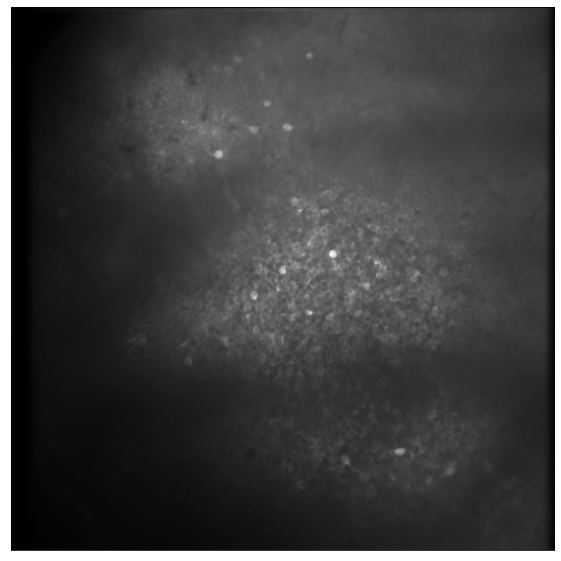

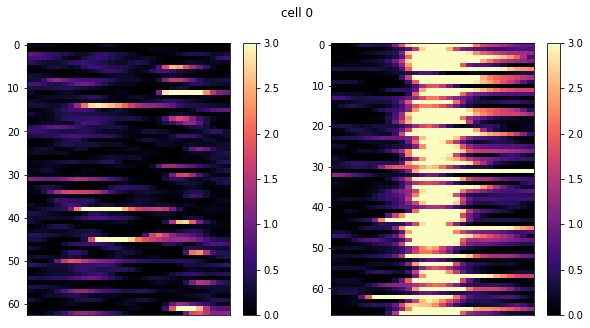

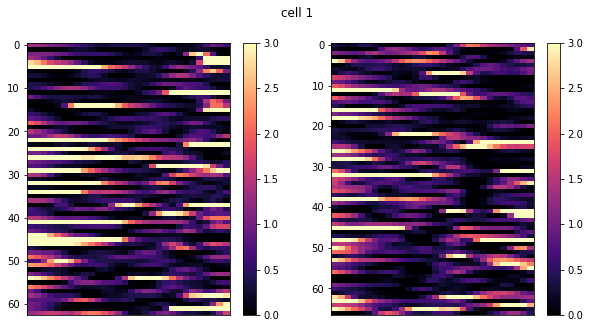

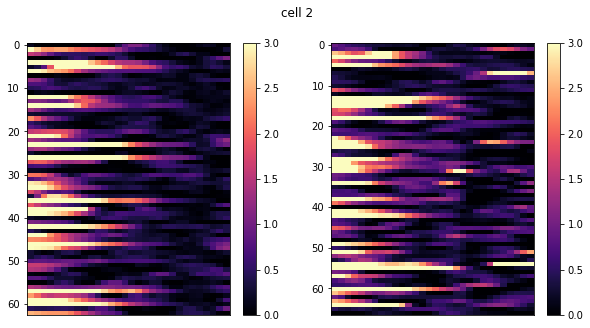

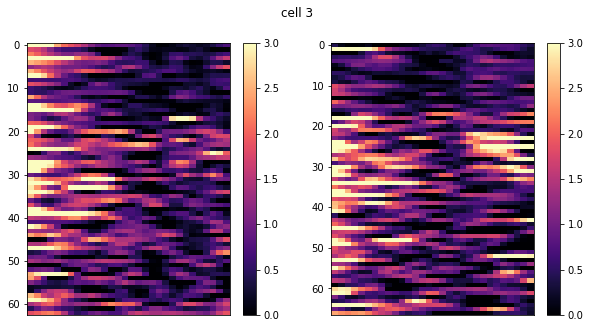

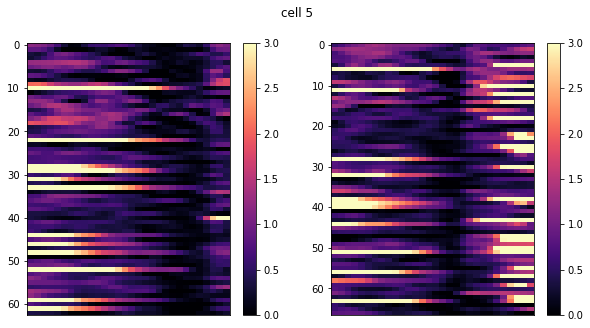

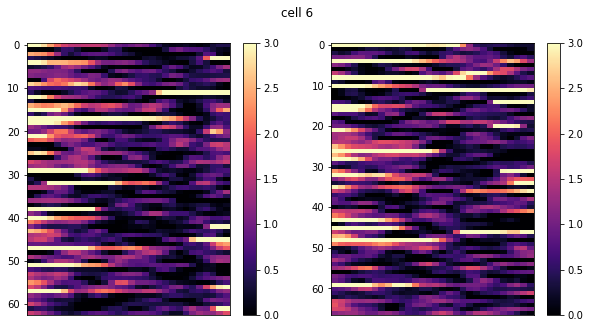

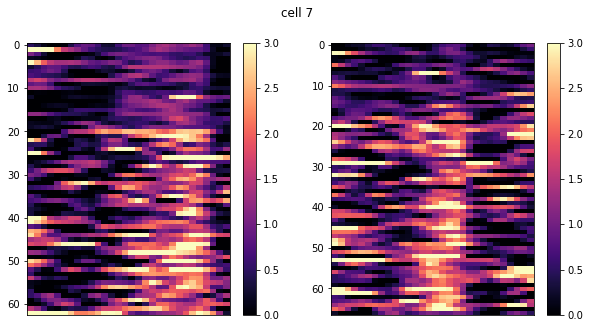

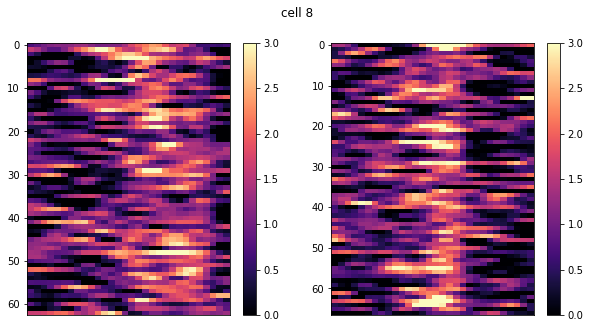

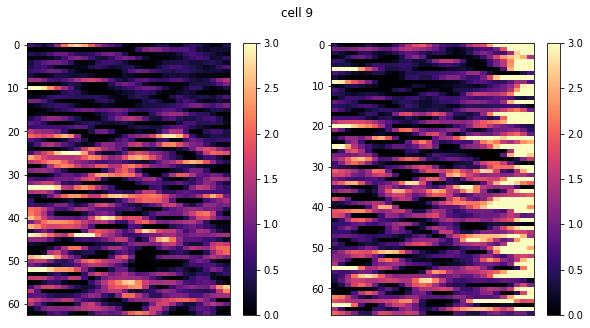

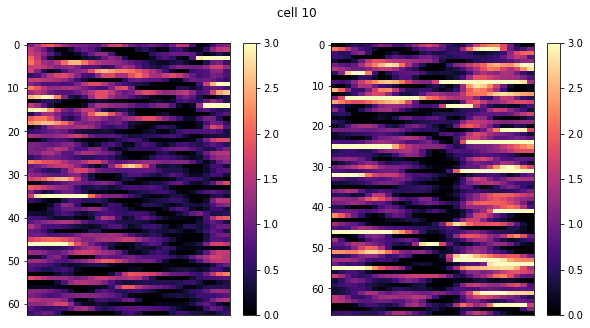

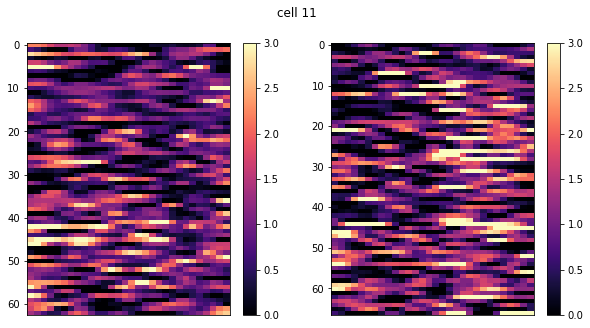

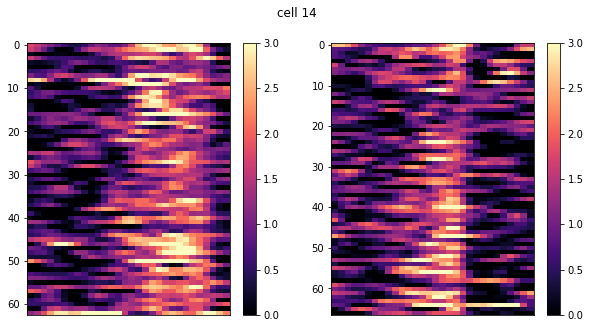

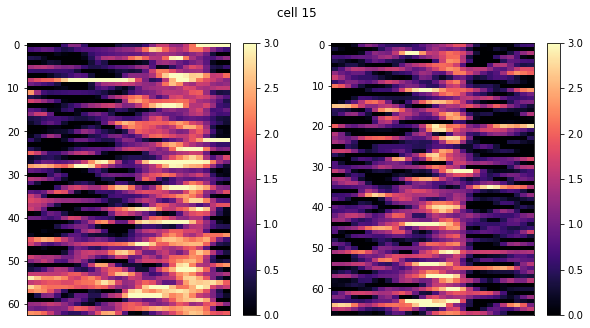

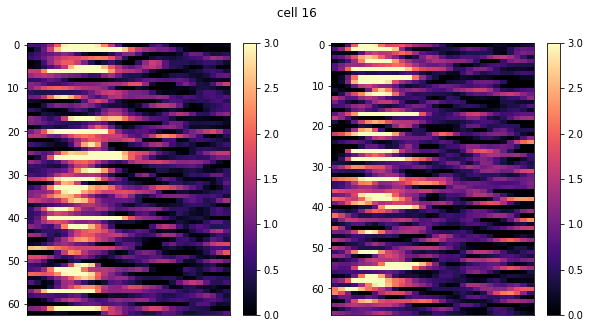

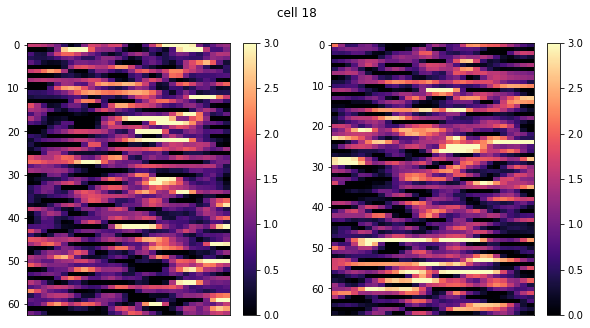

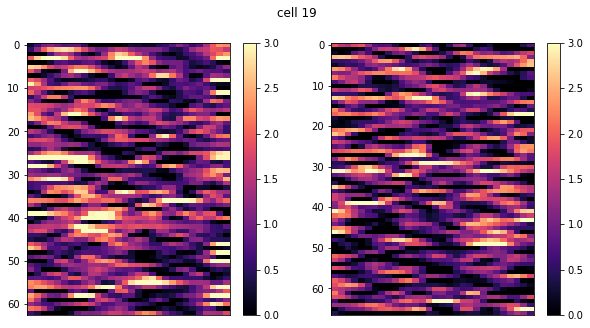

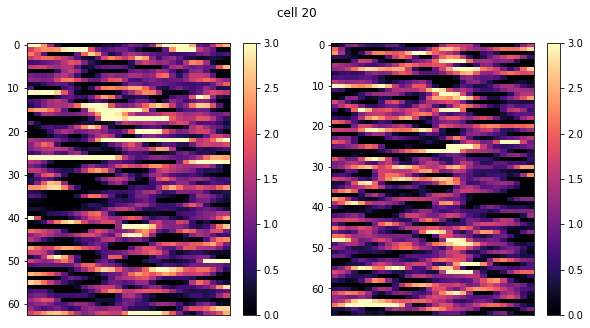

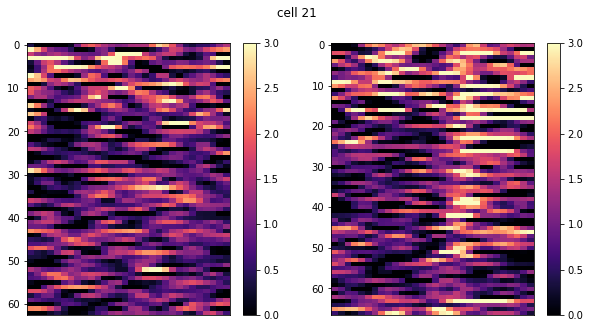

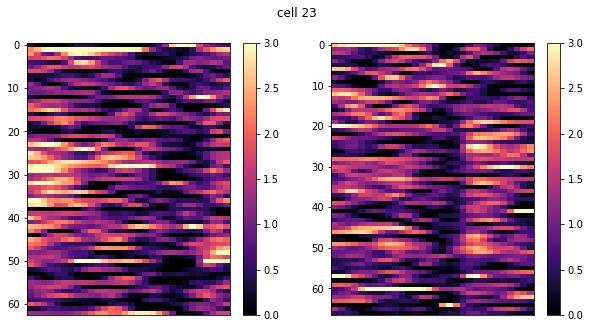

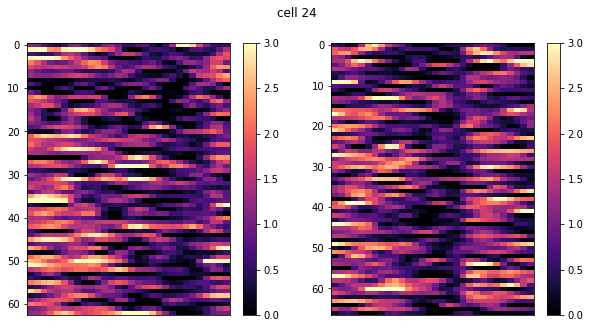

In [8]:
figdir = os.path.join("/mnt/BigDisk/YMazeResults/neural/example_place_cells/",mouse,f[0]['date'])
os.makedirs(figdir,exist_ok=True)

save =True

fig,ax = plt.subplots(figsize=[10,10])
ax.imshow(sess.s2p_ops[1]['meanImg'],aspect=796./512.,cmap="Greys_r")
ax.set_xticks([])
ax.set_yticks([])

if save:
    fig.savefig(os.path.join(figdir,"mean_img.pdf"),format='pdf')


for cell in pc_inds:
    fig, ax = plt.subplots(1,2, figsize = [10, 5])
    
    fam_trialmat, nov_trialmat = sess.trial_matrices['F_dff_norm'][sess.trial_info['LR']==-1*sess.novel_arm,:,:][:,:,cell], sess.trial_matrices['F_dff_norm'][sess.trial_info['LR']==sess.novel_arm,:,:][:,:,cell]
    mean = np.nanmean(sess.trial_matrices['F_dff_norm'][:,:,cell].ravel())
    fam_trialmat[np.isnan(fam_trialmat)]=1E-3
    nov_trialmat[np.isnan(nov_trialmat)]=1E-3
    h = ax[0].imshow(sp.ndimage.filters.gaussian_filter1d(fam_trialmat,1,axis=1)/mean, cmap = 'magma', aspect='auto', vmin = 0, vmax=3)
    plt.colorbar(h,ax=ax[0])
    h = ax[1].imshow(sp.ndimage.filters.gaussian_filter1d(nov_trialmat,1,axis=1)/mean, cmap = 'magma', aspect='auto', vmin = 0, vmax=3)
    plt.colorbar(h,ax=ax[1])
    
    for a in ax:
        a.set_xticks([])
        
    
    
    fig.suptitle("cell %d" % cell)
    
    if save:
        fig.savefig(os.path.join(figdir,"cell%d.pdf" % cell),format = 'pdf')